In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")
import datetime as dt

In [2]:
customer =pd.read_csv("Customer.csv")
Category=pd.read_csv("prod_cat_info.csv")
transections = pd.read_csv("Transactions.csv")

In [3]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
Category.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
transections.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:

Category=Category.rename(columns={"prod_sub_cat_code": "prod_subcat_code"})

In [7]:
Category

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [8]:
#Question1
customer_pre_final = customer.merge(transections,how="inner",left_on="customer_Id",right_on="cust_id")

In [9]:
customer_pre_final.drop(columns=["cust_id"])

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,268408,02-01-1970,M,4.0,87243835584,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop
1,268408,02-01-1970,M,4.0,16197868036,16-12-2013,1,4,-5,-210,110.250,-1160.250,Flagship store
2,268408,02-01-1970,M,4.0,16197868036,12/12/2013,1,4,5,210,110.250,1160.250,Flagship store
3,268408,02-01-1970,M,4.0,28810141075,2/9/2013,10,6,2,813,170.730,1796.730,TeleShop
4,268408,02-01-1970,M,4.0,64633435931,6/5/2013,4,2,3,312,98.280,1034.280,Flagship store
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,269626,27-12-1992,F,5.0,71369029396,18-10-2011,12,6,1,638,66.990,704.990,e-Shop
23049,269626,27-12-1992,F,5.0,94134051896,7/7/2011,3,1,3,1078,339.570,3573.570,MBR
23050,274308,29-12-1992,F,5.0,26208690928,22-10-2012,1,2,2,898,188.580,1984.580,MBR
23051,274308,29-12-1992,F,5.0,57358822237,5/9/2012,1,2,4,876,367.920,3871.920,e-Shop


In [10]:
customer_pre_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23053 entries, 0 to 23052
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_Id       23053 non-null  int64  
 1   DOB               23053 non-null  object 
 2   Gender            23044 non-null  object 
 3   city_code         23045 non-null  float64
 4   transaction_id    23053 non-null  int64  
 5   cust_id           23053 non-null  int64  
 6   tran_date         23053 non-null  object 
 7   prod_subcat_code  23053 non-null  int64  
 8   prod_cat_code     23053 non-null  int64  
 9   Qty               23053 non-null  int64  
 10  Rate              23053 non-null  int64  
 11  Tax               23053 non-null  float64
 12  total_amt         23053 non-null  float64
 13  Store_type        23053 non-null  object 
dtypes: float64(3), int64(7), object(4)
memory usage: 2.6+ MB


In [11]:
customer_final=customer_pre_final.merge(Category,how="inner",left_on=["prod_cat_code","prod_subcat_code"],right_on=["prod_cat_code","prod_subcat_code"])

In [12]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,87243835584,268408,13-01-2014,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,16-01-1970,M,4.0,73109425404,275152,25-03-2011,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,18-01-1970,F,4.0,64777271023,275034,23-05-2011,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,22-01-1970,F,8.0,87174343938,270829,9/12/2013,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,29-01-1970,F,7.0,76242744953,267657,23-05-2013,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,04-12-1992,F,1.0,63540378797,267812,10/10/2012,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,09-12-1992,F,7.0,71793203305,274618,17-08-2013,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,15-12-1992,F,7.0,91217108818,268097,1/2/2012,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,15-12-1992,F,7.0,90114483354,268097,31-01-2011,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction


In [13]:
#2a
customer_final.dtypes

customer_Id           int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [14]:
customer_final["DOB"]=customer_final["DOB"].apply(lambda x:pd.to_datetime(x))
customer_final["tran_date"]=customer_final["tran_date"].apply(lambda x:pd.to_datetime(x))

In [15]:
customer_final.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code', 'transaction_id',
       'cust_id', 'tran_date', 'prod_subcat_code', 'prod_cat_code', 'Qty',
       'Rate', 'Tax', 'total_amt', 'Store_type', 'prod_cat', 'prod_subcat'],
      dtype='object')

In [16]:
customer_final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [17]:
customer_final.isnull().sum()

customer_Id         0
DOB                 0
Gender              9
city_code           8
transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
dtype: int64

In [18]:
customer_final.drop_duplicates(inplace=True)

In [19]:
customer_final.duplicated().sum()

0

In [20]:
#2b
customer_final.head(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction
5,274630,1970-01-02,M,4.0,78357345891,274630,2012-11-04,7,5,1,646,67.830,713.830,TeleShop,Books,Fiction
6,273541,1970-01-02,M,4.0,23916816961,273541,2013-09-02,7,5,4,410,172.200,1812.200,e-Shop,Books,Fiction
7,269008,1970-02-13,F,6.0,35560569829,269008,2013-09-03,7,5,1,1441,151.305,1592.305,e-Shop,Books,Fiction
8,269008,1970-02-13,F,6.0,94033312891,269008,2012-04-26,7,5,5,746,391.650,4121.650,MBR,Books,Fiction
9,267199,1970-02-14,NaN,2.0,56749259881,267199,2012-11-01,7,5,4,1049,440.580,4636.580,MBR,Books,Fiction


In [21]:
customer_final.tail(10)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23043,268914,1992-11-15,F,3.0,1407823655,268914,2011-10-06,10,5,1,1252,131.460,1383.460,MBR,Books,Non-Fiction
23044,269519,1992-11-17,M,9.0,29719500605,269519,2013-12-24,10,5,4,1036,435.120,4579.120,TeleShop,Books,Non-Fiction
23045,273524,1992-11-25,F,1.0,25762805863,273524,2012-11-19,10,5,1,1401,147.105,1548.105,Flagship store,Books,Non-Fiction
23046,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-22,10,5,-3,-1422,447.930,-4713.930,e-Shop,Books,Non-Fiction
23047,272141,1992-02-12,F,10.0,71337087467,272141,2012-07-16,10,5,3,1422,447.930,4713.930,e-Shop,Books,Non-Fiction
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction
23052,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-26,10,5,4,1408,591.360,6223.360,e-Shop,Books,Non-Fiction


In [22]:
#2c
customer_final["total_amt"].describe()

count    23040.000000
mean      2109.865226
std       2505.610295
min      -8270.925000
25%        762.450000
50%       1756.950000
75%       3570.255000
max       8287.500000
Name: total_amt, dtype: float64

In [23]:
#2d
customer_final.loc[:,customer_final.dtypes=="object"].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23031,23040,23040,23040
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11804,9304,6066,3046


In [24]:
freq_product = pd.crosstab(index=customer_final['Gender'],
                          columns=customer_final["prod_cat"])

In [25]:
freq_product

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,993,2946,1439,2328,1528,1993
M,1004,3116,1518,2567,1467,2132


In [26]:
freq_store_type = pd.crosstab(index = customer_final["Gender"],
                             columns=customer_final["Store_type"])

In [27]:
freq_store_type

Store_type,Flagship store,MBR,TeleShop,e-Shop
Gender,,,,
F,2263,2264,2145,4555
M,2312,2394,2352,4746


In [28]:
freq_city = pd.crosstab(index=customer_final["Gender"],
                       columns=customer_final["city_code"])

In [29]:
freq_city

city_code,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Gender,,,,,,,,,,
F,1184,1060,1082,1142,1156,1050,1252,938,1130,1231
M,1071,1203,1328,1280,1201,1073,1104,1390,1046,1102


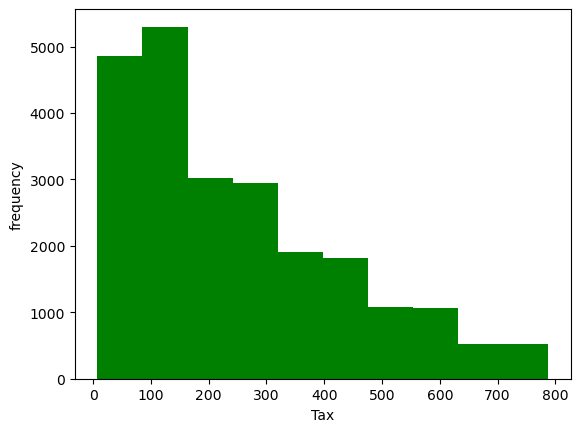

In [30]:
#Question 3
import matplotlib.pyplot as plt
Tax = customer_final["Tax"]
plt.hist(Tax,color=["green"])
plt.xlabel("Tax")
plt.ylabel("frequency")
plt.show()

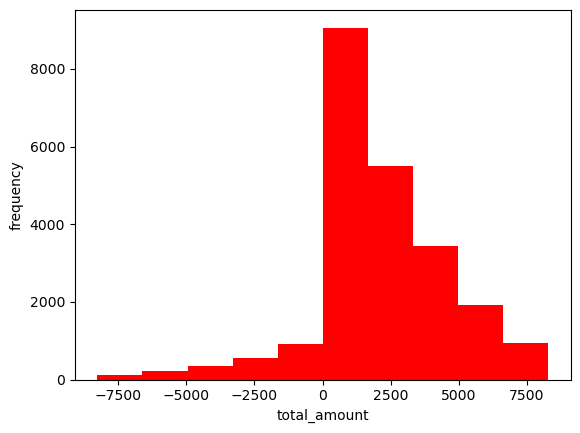

In [31]:
Total_Amount = customer_final["total_amt"]
plt.hist(Total_Amount,color="red")
plt.xlabel("total_amount")
plt.ylabel("frequency")
plt.show()

<AxesSubplot:>

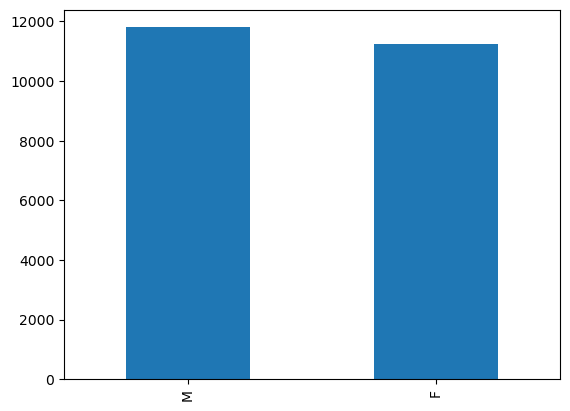

In [32]:
customer_final["Gender"].value_counts().plot(kind="bar")

<AxesSubplot:>

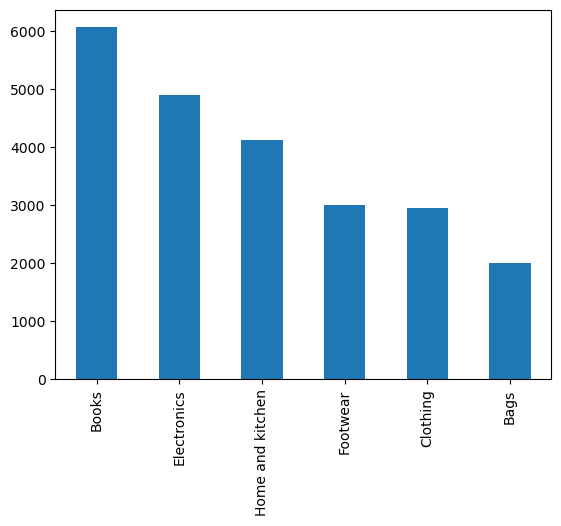

In [33]:
#for prod_code
customer_final["prod_cat"].value_counts().plot(kind="bar")

<AxesSubplot:>

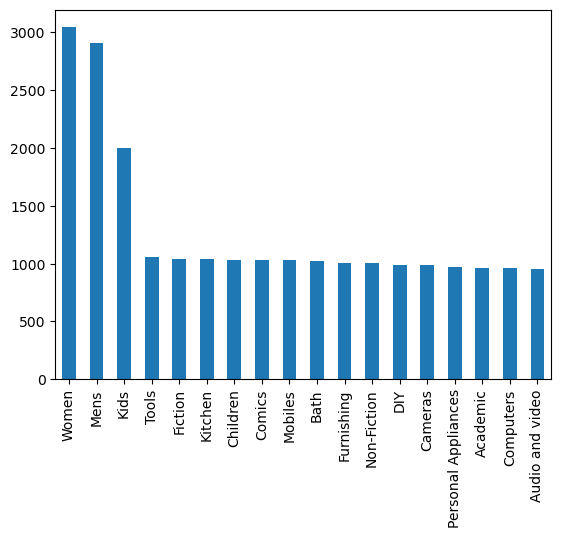

In [34]:
# for prod_subcat
customer_final["prod_subcat"].value_counts().plot(kind="bar")

<AxesSubplot:>

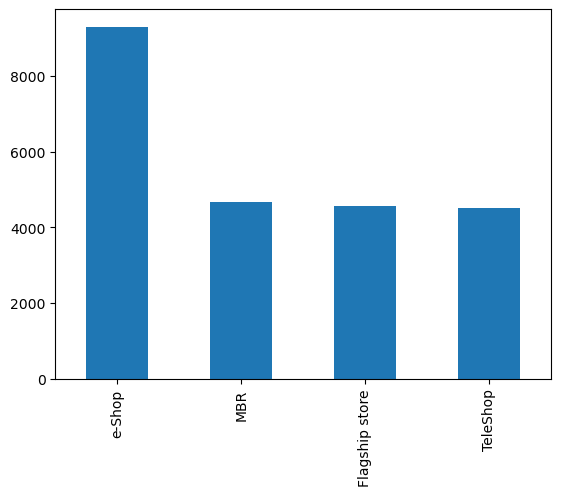

In [35]:
#for store_type
customer_final["Store_type"].value_counts().plot(kind="bar")

In [36]:
customer_final.sort_values(by="tran_date",ascending=False)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
9068,270810,1972-01-03,F,1.0,55245382907,270810,2014-12-02,4,3,2,979,205.590,2163.590,TeleShop,Electronics,Mobiles
20846,273552,1987-06-22,F,10.0,12323853707,273552,2014-12-02,12,6,4,510,214.200,2254.200,TeleShop,Home and kitchen,Tools
7730,267466,1987-06-08,F,7.0,97409887219,267466,2014-12-02,4,4,1,78,8.190,86.190,e-Shop,Bags,Women
14635,274652,1985-08-07,M,8.0,60596009595,274652,2014-12-02,12,5,4,183,76.860,808.860,MBR,Books,Academic
16048,266794,1971-02-28,F,9.0,15403541663,266794,2014-12-02,3,2,2,322,67.620,711.620,e-Shop,Footwear,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13553,271613,1981-12-09,F,1.0,24003493504,271613,2011-01-02,8,3,5,1238,649.950,6839.950,e-Shop,Electronics,Personal Appliances
14962,269958,1992-04-07,M,3.0,83849473598,269958,2011-01-02,12,5,3,403,126.945,1335.945,e-Shop,Books,Academic
19163,273949,1974-01-25,M,4.0,45127479223,273949,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics
1082,275166,1970-05-11,M,10.0,31795262740,275166,2011-01-02,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens


In [37]:
min_date = customer_final["tran_date"].min()
min_date

Timestamp('2011-01-02 00:00:00')

In [38]:
max_date =customer_final["tran_date"].max()
max_date

Timestamp('2014-12-02 00:00:00')

In [39]:
print("Time period  of the available transaction data is from"+pd.Timestamp.strftime(min_date,format="%d-%m-%y")+"to"
+pd.Timestamp.strftime(max_date,format="%d-%m-%y"))

Time period  of the available transaction data is from02-01-11to02-12-14


In [40]:
#4b
tran_neg=customer_final[customer_final["total_amt"]<0].count()
tran_neg

customer_Id         2164
DOB                 2164
Gender              2163
city_code           2164
transaction_id      2164
cust_id             2164
tran_date           2164
prod_subcat_code    2164
prod_cat_code       2164
Qty                 2164
Rate                2164
Tax                 2164
total_amt           2164
Store_type          2164
prod_cat            2164
prod_subcat         2164
dtype: int64

In [41]:
#5Q
customer_final.groupby(["prod_cat","Gender"])[["Qty"]].count().sort_values(by="Qty",ascending=False)

Qty
prod_cat         Gender      
Books            M       3116
                 F       2946
Electronics      M       2567
                 F       2328
Home and kitchen M       2132
                 F       1993
Footwear         F       1528
Clothing         M       1518
Footwear         M       1467
Clothing         F       1439
Bags             M       1004
                 F        993

In [42]:
#Q6
c1=customer_final["city_code"].value_counts()
c1

4.0     2422
3.0     2410
5.0     2357
7.0     2356
10.0    2333
8.0     2328
2.0     2268
1.0     2255
9.0     2176
6.0     2127
Name: city_code, dtype: int64

In [43]:
c2=customer_final["city_code"].count()
c2

23032

In [44]:
c3=(c1/c2)*100
c3

4.0     10.515804
3.0     10.463703
5.0     10.233588
7.0     10.229246
10.0    10.129385
8.0     10.107676
2.0      9.847169
1.0      9.790726
9.0      9.447725
6.0      9.234977
Name: city_code, dtype: float64

In [45]:
customer_final["Store_type"].value_counts()

e-Shop            9304
MBR               4660
Flagship store    4575
TeleShop          4501
Name: Store_type, dtype: int64

In [46]:
#Q7
customer_final.sort_values(["Rate","Qty"],ascending=False).head(1)["Store_type"]

3184    e-Shop
Name: Store_type, dtype: object

In [47]:
#Q9
customer_amount=customer_final[(customer_final["Gender"]=="M")&(customer_final["prod_cat"]=="Electronics")]["total_amt"].sum()

In [48]:
#Q8
customer_amount1=[(customer_final["Store_type"]== "Flagship store") & 
                  ((customer_final["prod_cat"]=="Elcetronics")|
                   (customer_final["prod_cat"]=="Clothing"))]["total_amt"].sum()
customer_amount1

TypeError: list indices must be integers or slices, not str

In [49]:
#Q10
positive_amt=customer_final.loc[customer_final["total_amt"]>0]

In [50]:
unique_trans = positive_amt.groupby(["customer_Id","prod_cat","prod_subcat"])["transaction_id"].count().reset_index()
unique_trans


,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [51]:
unique_transaction=unique_trans.groupby("customer_Id")[["transaction_id"]].count().sort_values(by="transaction_id",ascending=False)
unique_transaction

,transaction_id
customer_Id,
270908,10
272286,10
274854,10
273014,10
268076,9
...,...
270259,1
270265,1
267996,1


In [52]:
unique_transaction[unique_transaction["transaction_id"]>10]

,transaction_id
customer_Id,


In [53]:
#Q11
curr_year=pd.to_datetime("today").year
curr_year

2023

In [54]:
customer_final["DOB_year"]=customer_final["DOB"].dt.year
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_year
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,1970
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,1970
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,1970
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,1970
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992


In [55]:
customer_final["age"]=curr_year-customer_final["DOB_year"]
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_year,age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,1970,53
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,1970,53
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,1970,53
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,1970,53
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,1970,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992,31
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,31
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992,31
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,31


In [56]:
total_amt_spend=customer_final[((customer_final["prod_cat"]=="Electronics")|
                               (customer_final["prod_cat"]=="Books"))&
                              (customer_final["age"]>=25)&(customer_final["age"]<=35)]["total_amt"].sum()
total_amt_spend

4940387.595

In [57]:
age_25_35_customer = customer_final[(customer_final["age"]>=25)&(customer_final["age"]<=35)]
age_25_35_customer

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_year,age
823,270463,1988-06-01,M,9.0,56287350550,270463,2011-06-09,7,5,2,1112,233.520,2457.520,e-Shop,Books,Fiction,1988,35
824,270388,1988-01-22,M,9.0,73882970999,270388,2012-09-20,7,5,4,730,306.600,3226.600,Flagship store,Books,Fiction,1988,35
825,273785,1988-01-22,M,5.0,79369372618,273785,2013-09-12,7,5,2,456,95.760,1007.760,TeleShop,Books,Fiction,1988,35
826,268773,1988-08-02,M,1.0,68033148936,268773,2012-01-24,7,5,1,827,86.835,913.835,e-Shop,Books,Fiction,1988,35
827,270096,1988-02-28,M,10.0,83330815681,270096,2012-11-21,7,5,4,185,77.700,817.700,MBR,Books,Fiction,1988,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992,31
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,31
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992,31
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,31


In [58]:
customer_final

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,DOB_year,age
0,268408,1970-02-01,M,4.0,87243835584,268408,2014-01-13,7,5,5,187,98.175,1033.175,TeleShop,Books,Fiction,1970,53
1,275152,1970-01-16,M,4.0,73109425404,275152,2011-03-25,7,5,2,464,97.440,1025.440,e-Shop,Books,Fiction,1970,53
2,275034,1970-01-18,F,4.0,64777271023,275034,2011-05-23,7,5,2,197,41.370,435.370,Flagship store,Books,Fiction,1970,53
3,270829,1970-01-22,F,8.0,87174343938,270829,2013-09-12,7,5,4,1141,479.220,5043.220,e-Shop,Books,Fiction,1970,53
4,267657,1970-01-29,F,7.0,76242744953,267657,2013-05-23,7,5,4,1020,428.400,4508.400,e-Shop,Books,Fiction,1970,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,1992-04-12,F,1.0,63540378797,267812,2012-10-10,10,5,3,224,70.560,742.560,TeleShop,Books,Non-Fiction,1992,31
23049,274618,1992-09-12,F,7.0,71793203305,274618,2013-08-17,10,5,4,691,290.220,3054.220,Flagship store,Books,Non-Fiction,1992,31
23050,268097,1992-12-15,F,7.0,91217108818,268097,2012-01-02,10,5,2,411,86.310,908.310,e-Shop,Books,Non-Fiction,1992,31
23051,268097,1992-12-15,F,7.0,90114483354,268097,2011-01-31,10,5,-4,-1408,591.360,-6223.360,e-Shop,Books,Non-Fiction,1992,31


In [59]:
t_date = age_25_35_customer[(age_25_35_customer["tran_date"]>"2014-01-01") & (age_25_35_customer["tran_date"]>"2014-03-01")]
total_amount = t_date.total_amt.sum()
print("Total amount spent by the customer -",total_amount)

Total amount spent by the customer - 168775.49
